<table align="left">
  <td>
    <a href="https://is.gd/M5qGmU" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Applied Machine Learning Techniques to Breast Cancer Recurrence Classification


## Data Science Project - 2 Classes

Diego R. Páez Ardila - 2120653


**New version: 20/04/2023**


# Methodology

1. **General Pre-Processing (GPP)**: The dataset is studied to identify missing data, analyze the correlation between the attributes and the target class, observe if there is an imbalance in the target class and identify if it is necessary to apply regularization to the data.

2. **Experiments**: Four experiments (E-1 to E-4) were defined to evaluate the performance of different machine learning models in breast cancer recurrence classification.

    1. **E-1**: Training of Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), k nearest neighbors (KNN) and XGBoots (XGB) models using the original dataset.

    2. **E-2 (E-1 + GPP)**: Training of Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), k nearest neighbors (KNN) and XGBoots (XGB) models using the dataset with GPP.

    3. **E-3 (E-2 + Feature Extraction)**: A feature selection techniques (mRMR) is applied to the GPP dataset to select the most significant attributes for the target class in the dataset. Then, the training of Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), k nearest neighbors (KNN) and XGBoots (XGB) models is performed using the dataset with GPP + Feature Extraction. 

    4. **E-4 (E-3 + Oversample)**: The technique SMOTE is applied to the dataset with GPP + Feature Extraction to balance the target class. Then, the training of Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), k nearest neighbors (KNN) and XGBoots (XGB) models is performed using the dataset with GPP + Feature Extraction + Oversample.

8. **Test E-1 to E-4**: All the models trained in the experiments are tested using the test dataset.

9. **Models Evaluation**: Precision, Recall, F1-score, Cohen Kappa Score, AUROC, Accuracy. 

<a href="https://ibb.co/3YCjfWk"><img src="https://i.ibb.co/G358skF/DS-Cancer-v2.jpg" alt="DS-Cancer-v2" width=400 border="0"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score, accuracy_score  
from sklearn.metrics import roc_curve, roc_auc_score, f1_score,precision_score,recall_score  
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


# 1- General Pre-Processing (GPP)

The dataset is studied to identify missing data, analyze the correlation between the attributes and the target class, observe if there is an imbalance in the target class and identify if it is necessary to apply regularization to the data.

In [3]:
df_2classes = pd.read_excel('dadoscancer_2classes.xlsx')
df_2classes.head()

,Cancer Type Detailed,Subtype,Diagnosis Age,Sex,Ethnicity Category,Race Category,Neoplasm Cancer Code,Aneuploidy Score,Buffa Hypoxia Score,Ragnum Hypoxia Score,Winter Hypoxia Score,Fraction Genome Altered,In PanCan Pathway Analysis,Mutation Count,Post Initial Therapy,Prior Diagnosis,Radiation Therapy,Tissue Prospective Indicator,Class
0,2,2,55,0,1,2,11,19,-21,0,-28,0.7787,1,24,0,0,0,0,0
1,1,1,50,0,1,1,5,22,5,18,20,0.7164,1,458,0,0,1,0,1
2,0,0,54,0,1,0,4,16,27,14,22,0.4163,1,62,1,0,1,0,0
3,1,2,66,0,0,2,1,3,-27,-8,-20,0.0862,1,41,0,0,1,0,1
4,1,0,36,0,1,1,9,9,17,12,4,0.6407,1,128,1,0,1,0,0


In [4]:
df_2classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cancer Type Detailed          344 non-null    int64  
 1   Subtype                       344 non-null    int64  
 2   Diagnosis Age                 344 non-null    int64  
 3   Sex                           344 non-null    int64  
 4   Ethnicity Category            344 non-null    int64  
 5   Race Category                 344 non-null    int64  
 6   Neoplasm Cancer Code          344 non-null    int64  
 7   Aneuploidy Score              344 non-null    int64  
 8   Buffa Hypoxia Score           344 non-null    int64  
 9   Ragnum Hypoxia Score          344 non-null    int64  
 10  Winter Hypoxia Score          344 non-null    int64  
 11  Fraction Genome Altered       344 non-null    float64
 12  In PanCan Pathway Analysis    344 non-null    int64  
 13  Mutat

In [5]:
df_2classes.nunique()

Cancer Type Detailed              5
Subtype                           5
Diagnosis Age                    61
Sex                               2
Ethnicity Category                2
Race Category                     3
Neoplasm Cancer Code             12
Aneuploidy Score                 33
Buffa Hypoxia Score              44
Ragnum Hypoxia Score             27
Winter Hypoxia Score             47
Fraction Genome Altered         335
In PanCan Pathway Analysis        2
Mutation Count                  120
Post Initial Therapy              2
Prior Diagnosis                   2
Radiation Therapy                 2
Tissue Prospective Indicator      2
Class                             2
dtype: int64

In [6]:
df_2classes.isnull().sum()

Cancer Type Detailed            0
Subtype                         0
Diagnosis Age                   0
Sex                             0
Ethnicity Category              0
Race Category                   0
Neoplasm Cancer Code            0
Aneuploidy Score                0
Buffa Hypoxia Score             0
Ragnum Hypoxia Score            0
Winter Hypoxia Score            0
Fraction Genome Altered         0
In PanCan Pathway Analysis      0
Mutation Count                  0
Post Initial Therapy            0
Prior Diagnosis                 0
Radiation Therapy               0
Tissue Prospective Indicator    0
Class                           0
dtype: int64

## Histograms Matrix 

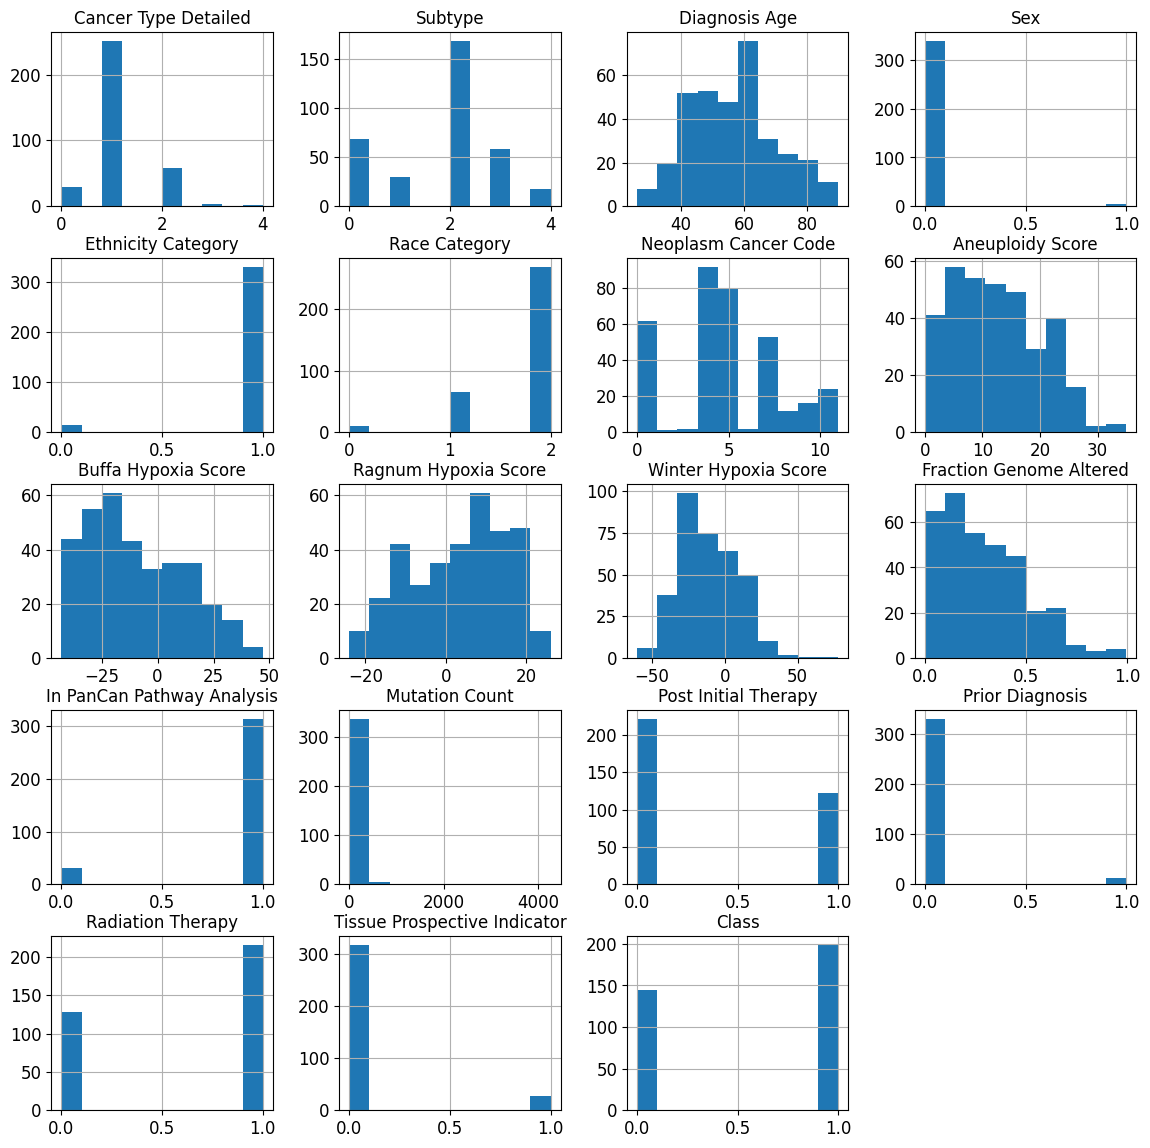

In [7]:
df_2classes.hist(figsize=(14,14))
plt.show()

## Density Graphs

This analysis is performed to identify if there are outliers in the dataset. The density graphs of the continuous variables are shown below.

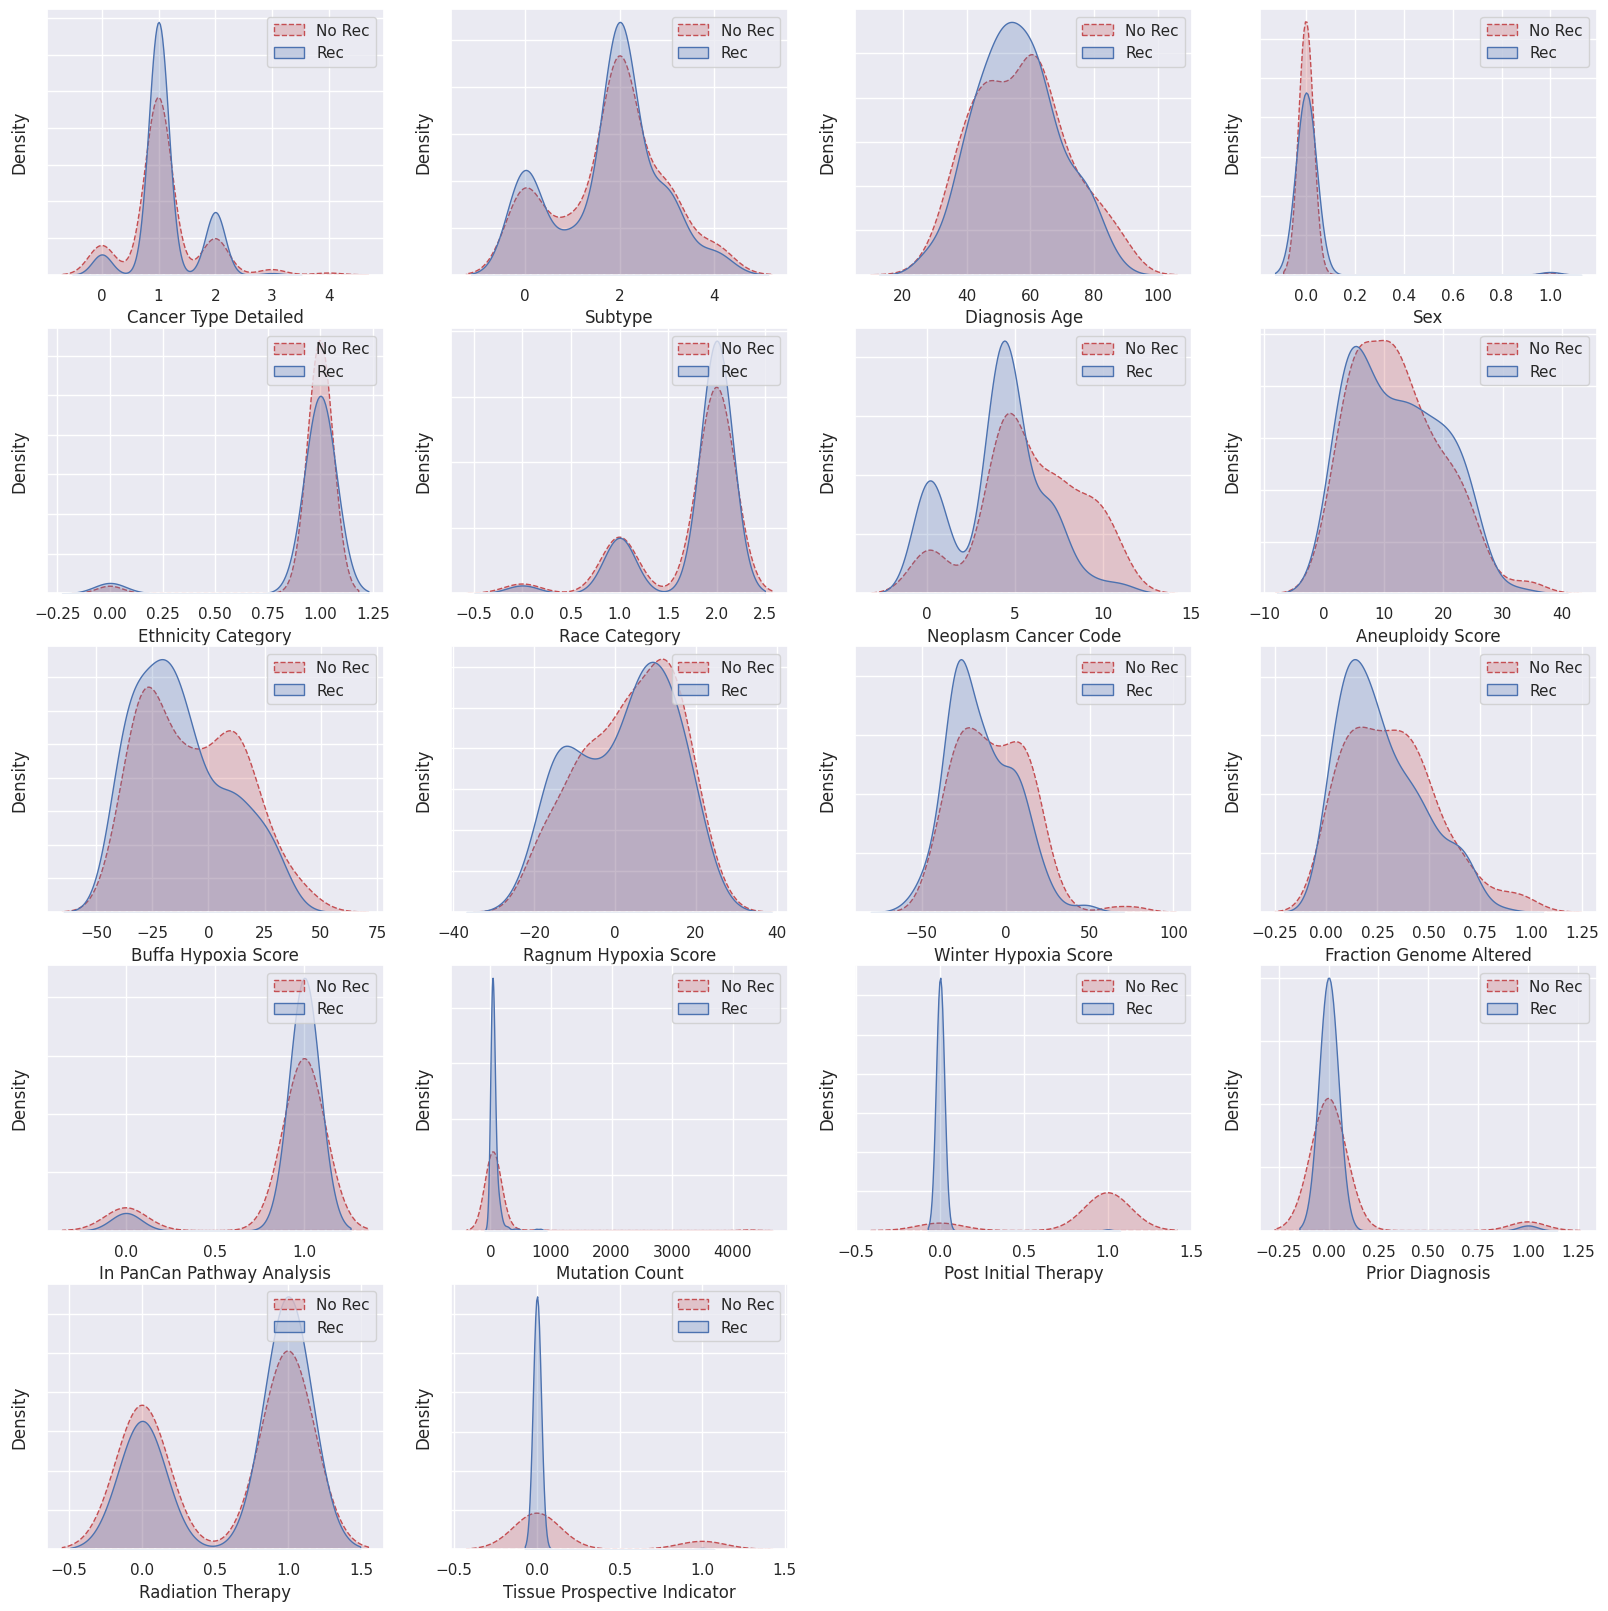

In [8]:
from utilities.visualization import plot_density_bin

plot_density_bin(df_2classes)

## Graphs Analysis 

Out of 18 attributes of the dataset, 6 continuous variables and 12 categorical variables were identified.

<img src="dataset.png" alt="Metodolog-a-3"  width="600" border="0"> 

### Sex Attribute

In the histogram of the dataset it was observed that the **sex attribute** has records for both women and men. Although there is a possibility that breast cancer occurs in men, the number of records present in the dataset is not significant, therefore, we proceed to identify how many male records exist in the dataset and eliminate them. By eliminating the records associated with men, the sex variable only presents one category, therefore, it is discarded. 

In [ ]:
counter = Counter(df_2classes["Sex"])
print(counter)
print('%s : %d' % ('Women', counter[0]))
print('%s : %d' % ('Men', counter[1]))

#Smote
idx_0 = np.where(df_2classes.Sex == 0)
idx_1 = np.where(df_2classes.Sex == 1)

Counter({0: 340, 1: 4})
Women : 340
Men : 4


In [ ]:
# remove men(idx_1) from dataset df_2classes - inplace=1
df_sexOut = df_2classes.drop(["Sex"], axis=1)
df_sexOut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cancer Type Detailed          344 non-null    int64  
 1   Subtype                       344 non-null    int64  
 2   Diagnosis Age                 344 non-null    int64  
 3   Ethnicity Category            344 non-null    int64  
 4   Race Category                 344 non-null    int64  
 5   Neoplasm Cancer Code          344 non-null    int64  
 6   Aneuploidy Score              344 non-null    int64  
 7   Buffa Hypoxia Score           344 non-null    int64  
 8   Ragnum Hypoxia Score          344 non-null    int64  
 9   Winter Hypoxia Score          344 non-null    int64  
 10  Fraction Genome Altered       344 non-null    float64
 11  In PanCan Pathway Analysis    344 non-null    int64  
 12  Mutation Count                344 non-null    int64  
 13  Post 

## Correlation Matrix

The attributes with the highest correlation with the target class are identified. 

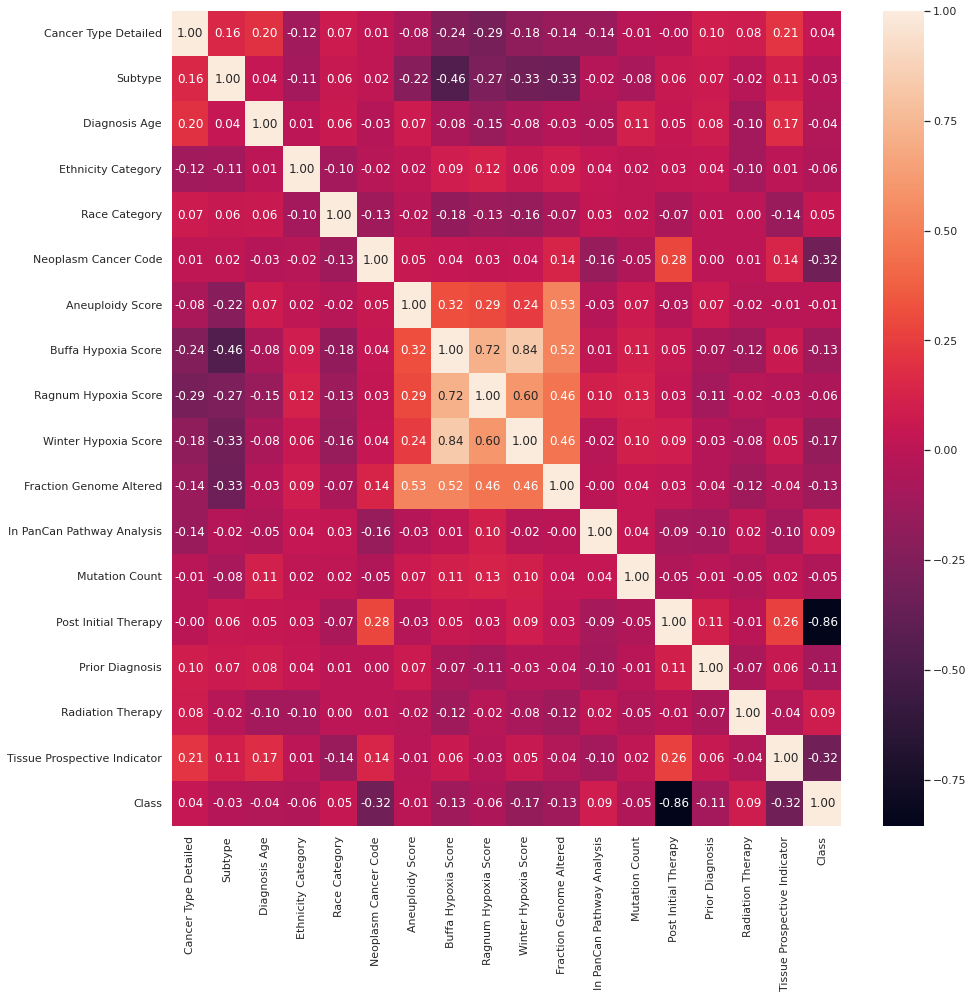

In [ ]:
f, ax = plt.subplots(1, figsize=(15,15))
sns.heatmap(df_sexOut.corr(), annot=True, ax=ax,fmt="0.2f")

## Target Class Analysis

It was identified that the distribution of data in the target class is unbalanced.

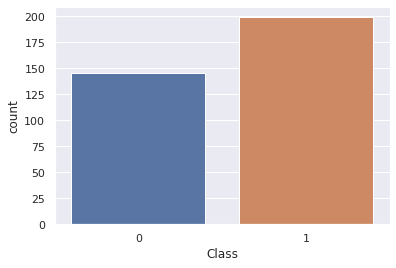

In [ ]:
sns.countplot(x=df_sexOut.Class)

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset
counter = Counter(df_sexOut["Class"])
print('%s : %d' % ('no Recurrence', counter[0]))
print('%s : %d' % ('Recurrence', counter[1]))

#10 Techniques to deal with Imbalanced Classes in Machine Learning
# https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/


no Recurrence : 145
Recurrence : 199


## Data Transformation

Handle discrete and continuous inputs together:

- Rescale bounded continuous features: All continuous input that are bounded, rescale them to [-1, 1] through $x = \frac{(2x - max - min)}{(max - min)}$.

- Standardize all continuous features: All continuous input should be standardized and by this I mean, for every continuous feature, compute its mean (u) and standard deviation (s) and do $x = \frac{(x - u)}{s}$.

- Binarize categorical/discrete features: For all categorical features, represent them as multiple boolean features. For example, instead of having one feature called marriage_status, have 3 boolean features - married_status_single, married_status_married, married_status_divorced and appropriately set these features to 1 or -1. As you can see, for every categorical feature, you are adding k binary feature where k is the number of values that the categorical feature takes.

[Reference](https://www.quora.com/Machine-Learning/What-are-good-ways-to-handle-discrete-and-continuous-inputs-together/answer/Arun-Iyer-1)

In [ ]:
df_categorical = df_sexOut.drop(["Diagnosis Age","Aneuploidy Score","Buffa Hypoxia Score","Ragnum Hypoxia Score","Winter Hypoxia Score","Fraction Genome Altered", "Mutation Count"], axis=1)
df_continuous  = df_sexOut.drop(df_categorical.columns,axis=1)
df_categorical = df_categorical.drop("Class", axis=1)
df_categorical.head().T

,0,1,2,3,4
Cancer Type Detailed,2,1,0,1,1
Subtype,2,1,0,2,0
Ethnicity Category,1,1,1,0,1
Race Category,2,1,0,2,1
Neoplasm Cancer Code,11,5,4,1,9
In PanCan Pathway Analysis,1,1,1,1,1
Post Initial Therapy,0,0,1,0,1
Prior Diagnosis,0,0,0,0,0
Radiation Therapy,0,1,1,1,1
Tissue Prospective Indicator,0,0,0,0,0


## Encode categorical integer features using a one-hot aka one-of-K scheme.

  - - Cancer Type Detailed
  - - Subtype
  - - Race Category
  - - Neoplasm Cancer Code

2. The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features.

3. The output will be a sparse matrix where each column corresponds to one possible value of one feature.

In [ ]:
df_categorical_int= df_categorical[['Cancer Type Detailed','Subtype',"Race Category",'Neoplasm Cancer Code']]
df_categorical_int.head()

,Cancer Type Detailed,Subtype,Race Category,Neoplasm Cancer Code
0,2,2,2,11
1,1,1,1,5
2,0,0,0,4
3,1,2,2,1
4,1,0,1,9


In [ ]:
# TODO: create a OneHotEncoder object, and fit it to all of X
# Ref: https://www.statology.org/one-hot-encoding-in-python/
# 1. INSTANTIATE
encoder = preprocessing.OneHotEncoder()

# 2. FIT
encoder.fit(df_categorical_int)

# 3. Transform
df_cat_int_onehot = pd.DataFrame(encoder.transform(df_categorical_int).toarray())

#merge one-hot encoded columns back with original DataFrame
df_1hot = df_categorical.join(df_cat_int_onehot)
df_categorical_1hot = df_1hot.drop(['Cancer Type Detailed','Subtype',"Race Category",'Neoplasm Cancer Code'], axis=1)
df_categorical_1hot.head().T

,0,1,2,3,4
Ethnicity Category,1.0,1.0,1.0,0.0,1.0
In PanCan Pathway Analysis,1.0,1.0,1.0,1.0,1.0
Post Initial Therapy,0.0,0.0,1.0,0.0,1.0
Prior Diagnosis,0.0,0.0,0.0,0.0,0.0
Radiation Therapy,0.0,1.0,1.0,1.0,1.0
Tissue Prospective Indicator,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0


## Standardize all continuous features

In [ ]:
df_scaled = preprocessing.scale(df_continuous)
df_continuous = pd.DataFrame(df_scaled, columns=df_continuous.columns)
df_continuous.head()

,Diagnosis Age,Aneuploidy Score,Buffa Hypoxia Score,Ragnum Hypoxia Score,Winter Hypoxia Score,Fraction Genome Altered,Mutation Count
0,-0.108690,0.911473,-0.521661,-0.238922,-0.787674,2.307478,-0.208074
1,-0.476698,1.312941,0.703906,1.266068,1.525751,2.011554,1.578998
2,-0.182292,0.510005,1.740924,0.931626,1.622143,0.586084,-0.051603
3,0.700925,-1.229691,-0.804484,-0.907807,-0.402103,-0.981885,-0.138074
4,-1.507117,-0.426755,1.269552,0.764405,0.754609,1.651981,0.220164


In [ ]:
df_continuous.describe()

,Diagnosis Age,Aneuploidy Score,Buffa Hypoxia Score,Ragnum Hypoxia Score,Winter Hypoxia Score,Fraction Genome Altered,Mutation Count
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02
mean,1.549148e-16,9.294890e-17,-1.032766e-17,-4.131062e-17,-1.161861e-17,-1.032766e-17,-2.065531e-17
std,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00
min,-2.243131e+00,-1.631160e+00,-1.558679e+00,-2.245576e+00,-2.329957e+00,-1.391334e+00,-3.027810e-01
25%,-7.711032e-01,-8.282229e-01,-8.044838e-01,-7.405856e-01,-7.876740e-01,-8.270356e-01,-1.998390e-01
50%,-3.508905e-02,-2.528628e-02,-1.445632e-01,9.552024e-02,-1.129252e-01,-2.202252e-01,-1.463092e-01
75%,6.273237e-01,7.776504e-01,8.924549e-01,7.644049e-01,7.546091e-01,6.423717e-01,-4.336729e-02
max,2.467359e+00,3.052638e+00,2.683668e+00,1.934953e+00,4.321139e+00,3.344875e+00,1.723853e+01


## Dataset GPP

Standardized continuous data are merged with categorical data after onehot is applied. 

In [ ]:
df_GPP = df_continuous.join(df_categorical_1hot)
df_GPP.head()

,Diagnosis Age,Aneuploidy Score,Buffa Hypoxia Score,Ragnum Hypoxia Score,Winter Hypoxia Score,Fraction Genome Altered,Mutation Count,Ethnicity Category,In PanCan Pathway Analysis,Post Initial Therapy,...,15,16,17,18,19,20,21,22,23,24
0,-0.108690,0.911473,-0.521661,-0.238922,-0.787674,2.307478,-0.208074,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.476698,1.312941,0.703906,1.266068,1.525751,2.011554,1.578998,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.182292,0.510005,1.740924,0.931626,1.622143,0.586084,-0.051603,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.700925,-1.229691,-0.804484,-0.907807,-0.402103,-0.981885,-0.138074,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.507117,-0.426755,1.269552,0.764405,0.754609,1.651981,0.220164,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0




---



# 2-Model Configuration



## Model Performance **Function**



- Confusion Matrix:
- Classification Report:
- Cohen Kappa Score:
- AUROC Score: 



In [ ]:
def performanceCal(ytest, ypredict):
  """
    Calculation of performance metrics:
    - Confusion Matrix:
    - Accuracy Score: https://is.gd/YwoQJf
    - Precision Score: https://is.gd/Xz6Nu0
    - F1-Score: https://is.gd/YVGWCs
    - Recall Score: https://is.gd/9PUCgT 
    - Cohen Kappa Score:
    - AUROC Score: https://is.gd/JIAktb
    Arguments:
        ytest: ndarray - list
        ypredict: ndarray - list
    Returns:
        List with result of performance metrics: matrixconfu,accuracyscore,
        precisionscore,f1score,recallscore,cohenkappa,auroc_score
    """

  matrixconfu  = confusion_matrix(ytest, ypredict)
  matrixreport = classification_report(ytest, ypredict)
  
  accuracyscore = round(accuracy_score(ytest, ypredict),3)
  f1score = round(f1_score(ytest, ypredict, average='weighted'),3)
  precisionscore = round(precision_score(ytest, ypredict, average='weighted'),3)
  recallscore = round(recall_score(ytest, ypredict, average='weighted'),3)
  

  cohenkappa= round(cohen_kappa_score(ytest, ypredict),3)
  auroc_score = round(roc_auc_score(ytest, ypredict),3)


  result = [matrixconfu,matrixreport,accuracyscore,precisionscore,f1score,recallscore,cohenkappa,auroc_score]
  return result

## Model Classifiers **Function**
Function for the application of the models in a systematic way.

In [ ]:
def modelClas(model,x,y,xtrain,ytrain,xtest):
  """
  Model Evaluation:

  Arguments:
      model: sklearn classifier model
      X_: ndarray - list
      y_: ndarray - list
      xtrain: ndarray - list
      ytrain: ndarray - list
      xtest: ndarray - list
  Returns:
      List with result accuracy kfold and model predictions
  """
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  scores_origin = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
  
  accuracy_kfold = round(mean(scores_origin),3)
  std_kfold = round(std(scores_origin),3)
  model.fit(xtrain, ytrain)
  model_predic = model.predict(xtest)

  # ['accuracy', 'average_precision', 'f1','recall', 'roc_auc']

  return [accuracy_kfold, std_kfold, model_predic]


In [ ]:
def heatmapgraph(data):
  ax = sns.heatmap(data, annot=True,xticklabels=['No Recurrence','Recurrence'],
                 yticklabels=['No Recurrence','Recurrence'],cbar=False, cmap='Blues')
  ax.set_xlabel("Prediction")
  ax.set_ylabel("Actual")



---



## MC- 1

**MC-1 (Training)**: Training of Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), k nearest neighbors (KNN) models using the original dataset.

Calculation of performance metrics using the original dataset, to have an initial reference point. 

Classification report - Logistic Regression: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.98      1.00      0.99        45

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Classification report - Naive Bayes: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.98      0.98      0.98        45

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

Classification report - SVM: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.65      1.00      0.79        45

    accuracy                           0.65        69
   macro av

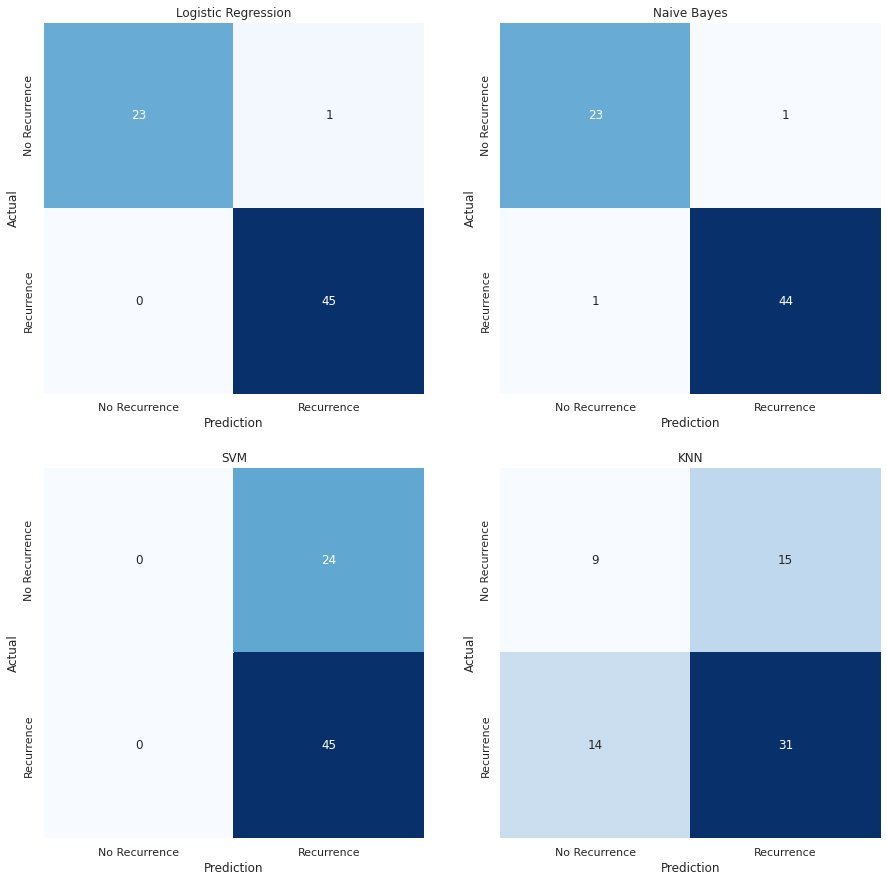

In [ ]:
X_origin = df_2classes.drop(["Class"], axis = 1)
y_origin = df_2classes.loc[:, 'Class']
X_train, X_test, y_train, y_test = train_test_split(X_origin, y_origin, test_size=0.2, random_state=1)

modelLR_MC1 = LogisticRegression()
modelNB_MC1 = GaussianNB()
modelSVC_MC1 = SVC()
modelKNN_MC1 = KNeighborsClassifier()

models_MC1=[modelLR_MC1,modelNB_MC1,modelSVC_MC1,modelKNN_MC1]
plt.subplots(2,2,figsize=(15,15))
modelsNames = ["Logistic Regression", "Naive Bayes", "SVM", "KNN"]
metricsResults = []

for idx, model in enumerate(models_MC1):
  modelResults = modelClas(model,X_origin,y_origin,X_train,y_train,X_test)
  metrics = performanceCal(y_test,modelResults[2])
  metrics.insert(2,modelsNames[idx])
  metrics.insert(3,modelResults[0])
  metrics.insert(4,modelResults[1])
  metricsResults.append(metrics[2:])

  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])

  print('Classification report - ' + modelsNames[idx] + ": \n"  ,metrics[1])

In [ ]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2],metricsResults[3]]
  
#define header names
col_names = ["Models", "Accuracy CV","STD CV", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC1_Results = pd.DataFrame(data=data, columns=col_names)
MC1_Results

,Models,Accuracy CV,STD CV,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.936,0.043,0.986,0.986,0.985,0.986,0.968,0.979
1,Naive Bayes,0.913,0.054,0.971,0.971,0.971,0.971,0.936,0.968
2,SVM,0.578,0.073,0.652,0.425,0.515,0.652,0.000,0.500
3,KNN,0.520,0.050,0.580,0.576,0.578,0.580,0.065,0.532




---



## General Split Train Test Dataset

In [ ]:
# Split data 80-20 %
X = df_GPP
y = df_sexOut.loc[:, 'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(np.shape(X_train))
print(np.shape(y_train))

print(np.shape(X_test))
print(np.shape(y_test))

(275, 38)
(275,)
(69, 38)
(69,)


##MC-2

Training of Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), k nearest neighbors (KNN) models using the dataset with GPP.


### Logistic Regression

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
modelLR = LogisticRegression()
# evaluate modelLR
scores = cross_val_score(modelLR, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f%% (%.3f%%)' % (mean(scores)*100.0, std(scores)*100.0))


Accuracy: 93.122% (5.439%)


This refers to classification accuracy, which is the number of correct predictions as a percentage of all predictions made. Our model has produced an accuracy of 94.454% (mean) with a standard deviation of 4.244%. 

#### Metrics for unbalanced Target Class

Accuracy is best when the number of observations in each class is the same.

In [ ]:
modelLR.fit(X_train, y_train)
predicted = modelLR.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[24  0]
 [ 1 44]]


{0: 25, 1: 44}

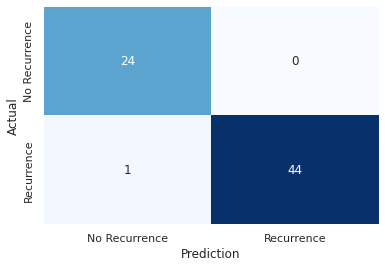

In [ ]:
ax = sns.heatmap(matrix, annot=True,xticklabels=['No Recurrence','Recurrence'],
                 yticklabels=['No Recurrence','Recurrence'],cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

unique, counts = np.unique(predicted, return_counts=True)
dict(zip(unique, counts))

We see the model predicted “No Recurrence” 24 times (24 + 0). It was correct 24 times and incorrect 0 times (100% correct) when it predicted “No Recurrence”. The model predicted “Recurrence” 45 times (1 + 44). It was correct 44 of those times and incorrect 1 times (98% correct) when “Recurrence” was predicted. 

Now, besides 94%, we have 100% and 98%. Which is correct?



In [ ]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.98      0.99        45

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



The screenshot above shows a classification report. There are four statistical columns: precision, recall, f1-score, and support. 

- Precision refers to what percent of our predictions were correct. This is where the 96% and 100% originated. The macro average is calculated as(.96 + 1.0)/2. The model uses greater precision than two decimal places and rounds at two decimal places. Finally, we arrive at .99 = (24/69)*.96 + (45/69)*1.0.

- Recall is the percentage of positive (or negative) cases the model could detect. In this scenario (24/24) = 1.0 and (44/45)=.98. The macro average and weighted average are computed using the same methods shown for precision.

- The F1-score is a weighted harmonic mean of precision and recall where the best possible score is 1.0 and the worst possible score is 0.0. It is considered better to use the **weighted average of the F1 score** to compare models, not the global accuracy score. In this model, both are 0.99, so there is no difference between the global accuracy and the weighted F1-score.

The support column provides the user with the number of observations in each row and column.

#### Cohen Kappa Score

- **Validity**, we are concerned with the degree to which a test measures what it claims to measure or in other words, how accurate the test is. 
- **Reliability** is concerned more with the degree to which a test produces similar results under consistent conditions or to put it another way, the precision of a test.

**Cohen’s kappa** measures the agreement between two raters who each classify N items into C mutually exclusive categories.

The value for kappa can be less than 0 (negative). A score of 0 means that there is random agreement among raters, whereas a score of 1 means that there is a complete agreement between the raters. 


In [ ]:
print('Cohen Kappa Score: %.2f ' % (cohen_kappa_score(y_test, predicted)))

Cohen Kappa Score: 0.97 


#### AUROC Score

[Reference](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

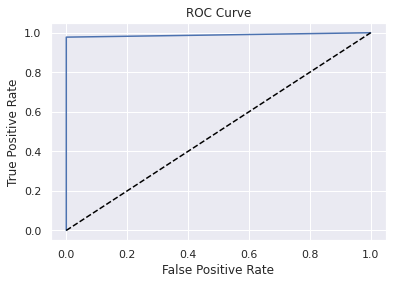

AUC Score: 98.89 


<Figure size 432x288 with 0 Axes>

In [ ]:
FPR, TPR, _ = roc_curve(y_test, predicted)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

auroc = roc_auc_score(y_test, predicted)
#print AUC score
print('AUC Score: %.2f ' % (auroc*100.0))

### Resume MC-2

Classification report - Logistic Regression: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.98      0.99        45

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Classification report - Naive Bayes: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.98      0.96      0.97        45

    accuracy                           0.96        69
   macro avg       0.95      0.96      0.95        69
weighted avg       0.96      0.96      0.96        69

Classification report - SVM: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.96      1.00      0.98        45

    accuracy                           0.97        69
   macro av

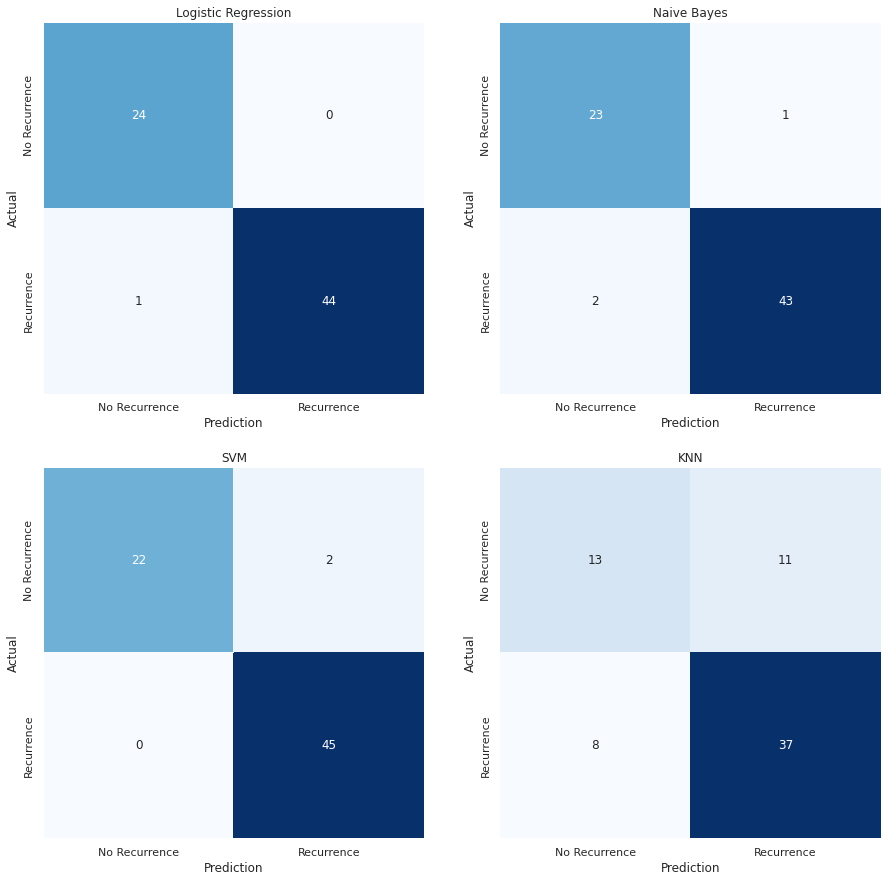

In [ ]:
modelLR_MC2 = LogisticRegression(random_state=1)
modelNB_MC2 = GaussianNB()
modelSVC_MC2 = SVC(random_state=1)
modelKNN_MC2 = KNeighborsClassifier()

models_MC2=[modelLR_MC2,modelNB_MC2,modelSVC_MC2,modelKNN_MC2]
plt.subplots(2,2,figsize=(15,15))
modelsNames = ["Logistic Regression", "Naive Bayes", "SVM", "KNN"]
metricsResults = []

for idx, model in enumerate(models_MC2):
  modelResults = modelClas(model,X,y,X_train,y_train,X_test)
  metrics = performanceCal(y_test,modelResults[2])
  metrics.insert(2,modelsNames[idx])
  metrics.insert(3,modelResults[0])
  metrics.insert(4,modelResults[1])
  metricsResults.append(metrics[2:])

  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])
  print('Classification report - ' + modelsNames[idx] + ": \n"  ,metrics[1])

In [ ]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2],metricsResults[3]]
  
#define header names
col_names = ["Models", "Accuracy CV","STD CV", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC2_Results = pd.DataFrame(data=data, columns=col_names)
MC2_Results

,Models,Accuracy CV,STD CV,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.945,0.042,0.986,0.986,0.986,0.986,0.968,0.989
1,Naive Bayes,0.898,0.051,0.957,0.957,0.957,0.957,0.905,0.957
2,SVM,0.933,0.047,0.971,0.972,0.971,0.971,0.935,0.958
3,KNN,0.753,0.070,0.725,0.718,0.720,0.725,0.375,0.682




---



## MC-3

A feature selection techniques (PCA) is applied to the GPP dataset to select the most significant attributes for the target class in the dataset. 


**MCP-3 (Training + GPP + Feature Extraction)**: Training of Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), k nearest neighbors (KNN) models using the dataset with GPP + Feature Extraction.


In [ ]:
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
pcaColumns = []
limit = pca.n_components_
for i in range (0,limit):
  name = "PCA" + str(i)
  pcaColumns.append(name)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = pd.DataFrame(data = X_train_pca, columns = pcaColumns)
X_test_pca =  pd.DataFrame(data = X_test_pca, columns = pcaColumns)


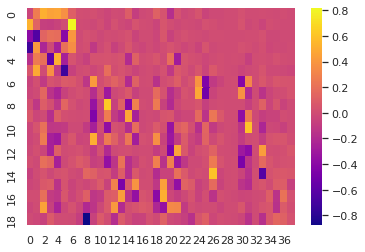

In [ ]:
plt.figure()
sns.heatmap(pca.components_,cmap="plasma")

In [ ]:
y_train_pca = y_train
y_test_pca = y_test

print(np.shape(X_train_pca))
print(np.shape(y_train_pca))

print(np.shape(X_test_pca))
print(np.shape(y_test_pca))


(275, 19)
(275,)
(69, 19)
(69,)


Classification report - Logistic Regression: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.98      0.99        45

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Classification report - Naive Bayes: 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.88      0.96      0.91        45

    accuracy                           0.88        69
   macro avg       0.89      0.85      0.87        69
weighted avg       0.89      0.88      0.88        69

Classification report - SVM: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.96      1.00      0.98        45

    accuracy                           0.97        69
   macro av

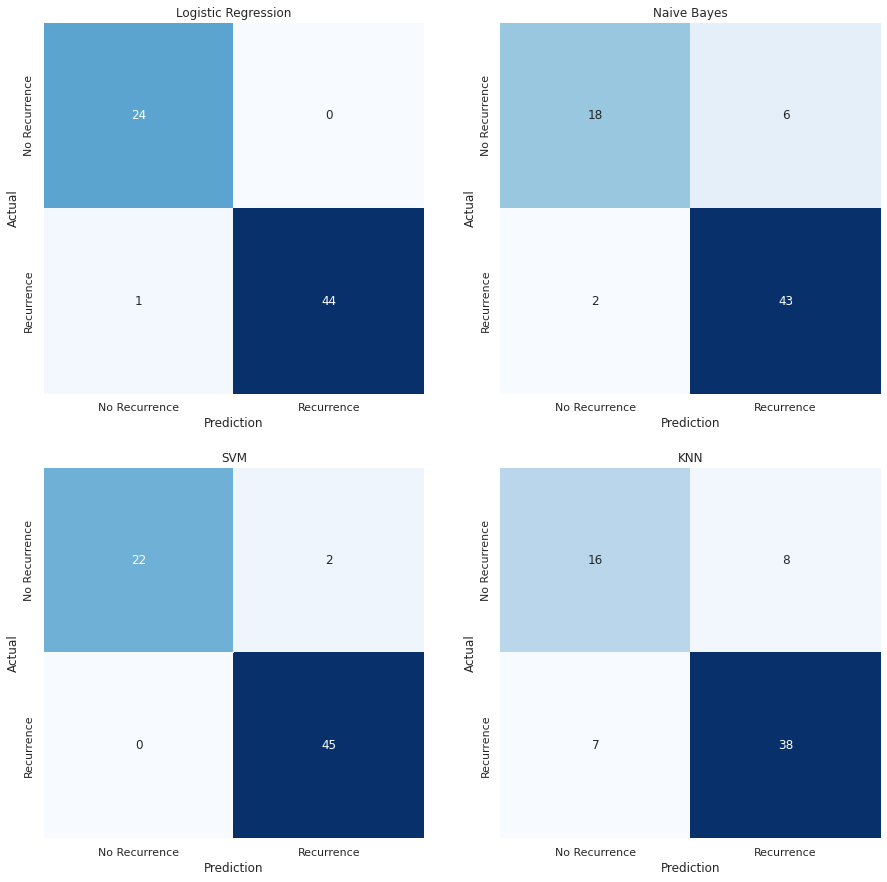

In [ ]:
modelLR_MC3 = LogisticRegression(random_state=1)
modelNB_MC3 = GaussianNB()
modelSVC_MC3 = SVC(random_state=1)
modelKNN_MC3 = KNeighborsClassifier()

models_MC3=[modelLR_MC3,modelNB_MC3,modelSVC_MC3,modelKNN_MC3]
plt.subplots(2,2,figsize=(15,15))
modelsNames = ["Logistic Regression", "Naive Bayes", "SVM", "KNN"]
metricsResults = []

for idx, model in enumerate(models_MC3):
  modelResults = modelClas(model,X_train_pca,y_train_pca,X_train_pca,y_train_pca,X_test_pca)
  metrics = performanceCal(y_test_pca,modelResults[2])
  metrics.insert(2,modelsNames[idx])
  metrics.insert(3,modelResults[0])
  metrics.insert(4,modelResults[1])
  metricsResults.append(metrics[2:])

  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])
  print('Classification report - ' + modelsNames[idx] + ": \n"  ,metrics[1])

In [ ]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2],metricsResults[3]]
  
#define header names
col_names = ["Models", "Accuracy CV","STD CV", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC3_Results = pd.DataFrame(data=data, columns=col_names)
MC3_Results

,Models,Accuracy CV,STD CV,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.924,0.059,0.986,0.986,0.986,0.986,0.968,0.989
1,Naive Bayes,0.833,0.098,0.884,0.885,0.881,0.884,0.734,0.853
2,SVM,0.917,0.071,0.971,0.972,0.971,0.971,0.935,0.958
3,KNN,0.771,0.063,0.783,0.781,0.781,0.783,0.516,0.756




---



## MC-4

**MCP-4 (Training + GPP + Feature Extraction + Oversample)**: Training of Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), k nearest neighbors (KNN) models using the dataset with GPP + Feature Extraction. To avoid the problem of imbalance in the target class, the SMOTE method is used. 

### Smote Algorithm - OverSampling

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
![Smote](https://miro.medium.com/max/734/1*yRumRhn89acByodBz0H7oA.png)

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train_pca)

print('Original dataset shape', Counter(y_train_pca))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({1: 154, 0: 121})
Resample dataset shape Counter({0: 154, 1: 154})


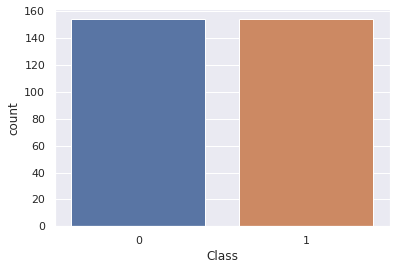

In [ ]:
sns.countplot(x=y_train_smote)

Classification report - Logistic Regression: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.98      0.99        45

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Classification report - Naive Bayes: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.90      0.96      0.92        45

    accuracy                           0.90        69
   macro avg       0.90      0.87      0.88        69
weighted avg       0.90      0.90      0.90        69

Classification report - SVM: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        45

    accuracy                           1.00        69
   macro av

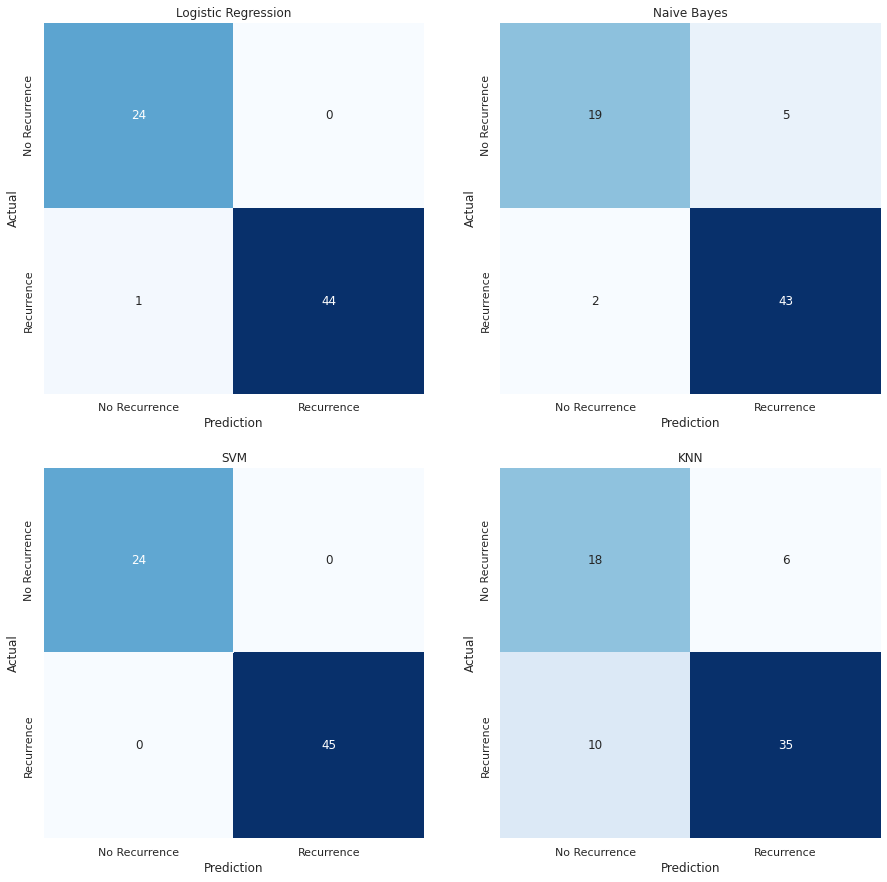

In [ ]:
modelLR_MC4 = LogisticRegression(random_state=1)
modelNB_MC4 = GaussianNB()
modelSVC_MC4 = SVC(random_state=1)
modelKNN_MC4 = KNeighborsClassifier()

models_MC4=[modelLR_MC4,modelNB_MC4,modelSVC_MC4,modelKNN_MC4]
plt.subplots(2,2,figsize=(15,15))
modelsNames = ["Logistic Regression", "Naive Bayes", "SVM", "KNN"]
metricsResults = []

for idx, model in enumerate(models_MC4):
  modelResults = modelClas(model,X_train_pca,y_train_pca,x_train_smote,y_train_smote,X_test_pca)
  metrics = performanceCal(y_test_pca,modelResults[2])
  metrics.insert(2,modelsNames[idx])
  metrics.insert(3,modelResults[0])
  metrics.insert(4,modelResults[1])
  metricsResults.append(metrics[2:])

  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])
  print('Classification report - ' + modelsNames[idx] + ": \n"  ,metrics[1])

In [ ]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2],metricsResults[3]]
  
#define header names
col_names = ["Models", "Accuracy CV","STD CV", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC4_Results = pd.DataFrame(data=data, columns=col_names)
MC4_Results

,Models,Accuracy CV,STD CV,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.924,0.059,0.986,0.986,0.986,0.986,0.968,0.989
1,Naive Bayes,0.833,0.098,0.899,0.899,0.897,0.899,0.770,0.874
2,SVM,0.917,0.071,1.000,1.000,1.000,1.000,1.000,1.000
3,KNN,0.771,0.063,0.768,0.780,0.772,0.768,0.508,0.764


# Performance of Trained Models 

Performance comparison of the trained models with k-fold cross validation

In [ ]:
mc1 = MC1_Results[["Accuracy CV","STD CV"]]
mc2 = MC2_Results[["Accuracy CV","STD CV"]]
mc3 = MC3_Results[["Accuracy CV","STD CV"]]
mc4 = MC4_Results[["Accuracy CV","STD CV"]]

headers= ["MC-1 CV","STD CV","MC-2 CV","STD CV","MC-3 CV","STD CV","MC-4 CV","STD CV"]
index = ["LR","NB","SVM","KNN"]

acc_CV = pd.concat([mc1,mc2,mc3,mc4], axis=1)
acc_CV.columns = headers
acc_CV.index = index

acc_CV

,MC-1 CV,STD CV,MC-2 CV,STD CV,MC-3 CV,STD CV,MC-4 CV,STD CV
LR,0.936,0.043,0.945,0.042,0.924,0.059,0.924,0.059
NB,0.913,0.054,0.898,0.051,0.833,0.098,0.833,0.098
SVM,0.578,0.073,0.933,0.047,0.917,0.071,0.917,0.071
KNN,0.520,0.050,0.753,0.070,0.771,0.063,0.771,0.063


#3-Parameter tuning using CV



## MC-1

### Logistic Regresion Tunning

In [ ]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2', "elasticnet"], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', "saga"],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_origin,y_origin)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)
print(clf.best_estimator_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9421008403361345
LogisticRegression(solver='newton-cg')


### Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_origin,y_origin)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
GaussianNB(var_smoothing=1.0865157746525372e-06)


### SVM

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf', "linear"]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

# fitting the model for grid search
grid.fit(X_origin,y_origin)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


### KNN

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_origin,y_origin)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

print(clf.best_estimator_)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 29
KNeighborsClassifier(leaf_size=1, n_neighbors=29, p=1)


## MC-2

### Logistic Regresion Tunning

In [ ]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2', "elasticnet"], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', "saga"],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)
print(clf.best_estimator_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9341269841269841
LogisticRegression(penalty='l1', solver='liblinear')


### Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
GaussianNB(var_smoothing=0.035444556739704335)


### SVM

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf', "linear"]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


### KNN

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

print(clf.best_estimator_)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 8
KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1)


## MC-3

### Logistic Regression

In [ ]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2', "elasticnet"], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', "saga"],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_train_pca,y_train_pca)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

print(clf.best_estimator_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Accuracy : 0.9306878306878307
LogisticRegression(solver='saga')


### Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_pca,y_train_pca)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.003511191734215131)


### SVM

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf', "linear"]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

# fitting the model for grid search
grid.fit(X_train_pca,y_train_pca)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


### KNN

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_pca,y_train_pca)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

print(clf.best_estimator_)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 8
KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1)


## MC-4

### Logistic Regression

In [ ]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2', "elasticnet"], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', "saga"],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(x_train_smote,y_train_smote)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

print(clf.best_estimator_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9286021505376345
LogisticRegression(penalty='l1', solver='liblinear')


### Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train_smote,y_train_smote)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.005336699231206307)


### SVM

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf', "linear"]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

# fitting the model for grid search
grid.fit(x_train_smote,y_train_smote)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


### KNN

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train_smote,y_train_smote)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

print(clf.best_estimator_)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 28
KNeighborsClassifier(leaf_size=1, n_neighbors=28, p=1)


In [ ]:
#%%shell
#jupyter nbconvert --to html /content/Projeto_DS.ipynb

[NbConvertApp] Converting notebook /content/Projeto_DS.ipynb to html
[NbConvertApp] Writing 1376778 bytes to /content/Projeto_DS.html
